PROJECT OLIST

In [215]:
#import library
import sqlite3
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

#import warning
import warnings
warnings.filterwarnings("ignore")

con = sqlite3.connect("olist.db")

#lihat list table
invoice = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", con)
invoice

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


LOAD DATA

In [216]:

customer = pd.read_sql_query ("""select * from olist_order_customer_dataset""", con) 
order = pd.read_sql_query("""select * from olist_order_dataset""", con)
reviews = pd.read_sql_query("""select * from olist_order_reviews_dataset""", con)
payment = pd.read_sql_query("""select * from olist_order_payments_dataset""", con)
order_item = pd.read_sql_query("""select * from olist_order_items_dataset""", con)
products = pd.read_sql_query("""select * from olist_products_dataset""", con)
sellers = pd.read_sql_query("""select * from olist_sellers_dataset""", con)
geolocation = pd.read_sql_query("""select * from olist_geolocation_dataset""", con)
product_category = pd.read_sql_query("""select * from product_category_name_translation""", con)


DATA CLEANSING 
(Melakukan data cleansing pada tabel yang akan dianalisis)
 

#Pengecekan data yang terindikasi duplikat
#Pengecakan nilai yang hilang (Missing value)
#Memilih kolom tabel yang digunakan pada setiap tabel
#Mengubah tipe data yang sesuai

Tabel Customer

In [217]:
customer.head()

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [220]:
#Cek duplikasi data
customer.duplicated().sum()

0

In [221]:
#Cek missing value
customer.isnull().sum()

index                       0
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [222]:
customer = customer[['customer_id', 'customer_city']]
customer.head()

,customer_id,customer_city
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas


Tabel Order

In [111]:
#Cek duplikasi data
order.duplicated().sum()

0

In [57]:
#Cek missing value
order.isnull().sum()

order_id                    0
order_status                0
order_purchase_timestamp    0
dtype: int64

In [204]:
#Ubah tipe data pada kolom order_purchase_timestamp menjadi data
order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'])

In [211]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          99441 non-null  int64         
 1   order_id                       99441 non-null  object        
 2   customer_id                    99441 non-null  object        
 3   order_status                   99441 non-null  object        
 4   order_purchase_timestamp       99441 non-null  datetime64[ns]
 5   order_approved_at              99281 non-null  object        
 6   order_delivered_carrier_date   97658 non-null  object        
 7   order_delivered_customer_date  96476 non-null  object        
 8   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 6.8+ MB


In [213]:
order = order[['order_id', 'customer_id']]
order.head()

,order_id,customer_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c


Tabel order item

In [716]:
#Cek duplikasi data
order_item.duplicated().sum()

#Cek missing value data
order_item.isnull().sum()

index                  0
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [142]:
order_item.info()
order_item.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                112650 non-null  int64  
 1   order_id             112650 non-null  object 
 2   order_item_id        112650 non-null  int64  
 3   product_id           112650 non-null  object 
 4   seller_id            112650 non-null  object 
 5   shipping_limit_date  112650 non-null  object 
 6   price                112650 non-null  float64
 7   freight_value        112650 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [194]:
order_item = order_item [['order_id','product_id','price']]
order_item.head()

,order_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90


Tabel Reviews

In [70]:
#Cek duplikasi
reviews.duplicated().sum()

0

In [68]:
#Cek missing value
reviews.isnull().sum()

index                          0
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [79]:
reviews.info()
#Ubah tipe data pada kolom order_purchase_timestamp menjadi data
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    99224 non-null  int64         
 1   review_id                99224 non-null  object        
 2   order_id                 99224 non-null  object        
 3   review_score             99224 non-null  int64         
 4   review_comment_title     11568 non-null  object        
 5   review_comment_message   40977 non-null  object        
 6   review_creation_date     99224 non-null  datetime64[ns]
 7   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 6.1+ MB


In [703]:
reviews = reviews [['review_id','order_id','review_score']]
reviews.head()

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


Tabel product category_name_translation

In [119]:
product_category.info()
product_category.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          71 non-null     int64 
 1   product_category_name          71 non-null     object
 2   product_category_name_english  71 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.8+ KB


,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor


In [133]:
#Pilih kolom product_category_name_english
product_category = product_category [['product_category_name_english']]
product_category.head()

,product_category_name_english
0,health_beauty
1,computers_accessories
2,auto
3,bed_bath_table
4,furniture_decor


In [134]:
#Cek data duplikasi
product_category.duplicated().sum()

0

In [135]:
#Cek missing value
product_category.isnull().sum()

product_category_name_english    0
dtype: int64

Tabel products

In [120]:
products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       32951 non-null  int64  
 1   product_id                  32951 non-null  object 
 2   product_category_name       32341 non-null  object 
 3   product_name_lenght         32341 non-null  float64
 4   product_description_lenght  32341 non-null  float64
 5   product_photos_qty          32341 non-null  float64
 6   product_weight_g            32949 non-null  float64
 7   product_length_cm           32949 non-null  float64
 8   product_height_cm           32949 non-null  float64
 9   product_width_cm            32949 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ MB


,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [178]:
#Kolom yang digunakan
products = products [['product_id']]
products.head()

,product_id
0,1e9e8ef04dbcff4541ed26657ea517e5
1,3aa071139cb16b67ca9e5dea641aaa2f
2,96bd76ec8810374ed1b65e291975717f
3,cef67bcfe19066a932b7673e239eb23d
4,9dc1a7de274444849c219cff195d0b71


In [129]:
#Cek duplikasi
products.duplicated().sum()

0

In [130]:
#Cek missing value
products.isnull().sum()

product_id    0
dtype: int64

MEMULAI TAHAP ANALISA SESUAI OBJEKTIVITAS

1. Kategori Produk dengan harga tertinggi (10 Besar)

In [361]:
# Menggabungkan products dan order_item berdasarkan 'product_id'
merged_products_order_item = pd.merge(products, order_item, on='product_id', how='left')
# Menggabungkan merger terbaru dengan product_category berdasarkan 'category_name'
Studi_Kasus_1 = pd.merge(merged_products_order_item, product_category, on='product_category_name', how='left')
Studi_Kasus_1.head()



,index_x,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,index_y,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,index,product_category_name_english
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,99413,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,6.0,perfumery
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,36254,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,46.0,art
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,852,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,5.0,sports_leisure
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,8850,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,11.0,baby
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,59150,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,7.0,housewares


In [362]:
#Pilih kolom tabel yang digunakan
Studi_Kasus_1=Studi_Kasus_1[['product_category_name_english','price']]
Studi_Kasus_1.head()

,product_category_name_english,price
0,perfumery,10.91
1,art,248.00
2,sports_leisure,79.80
3,baby,112.30
4,housewares,37.90


In [363]:
#Cek missing value
Studi_Kasus_1.isnull().sum()

product_category_name_english    1627
price                               0
dtype: int64

In [364]:
#Catatan : Karena ada missing value, maka tahap yang harus dilakuan adalah handling data
Studi_Kasus_1['product_category_name_english']=Studi_Kasus_1['product_category_name_english'].fillna('unkown')
#Cek lagi
Studi_Kasus_1.isnull().sum()

product_category_name_english    0
price                            0
dtype: int64

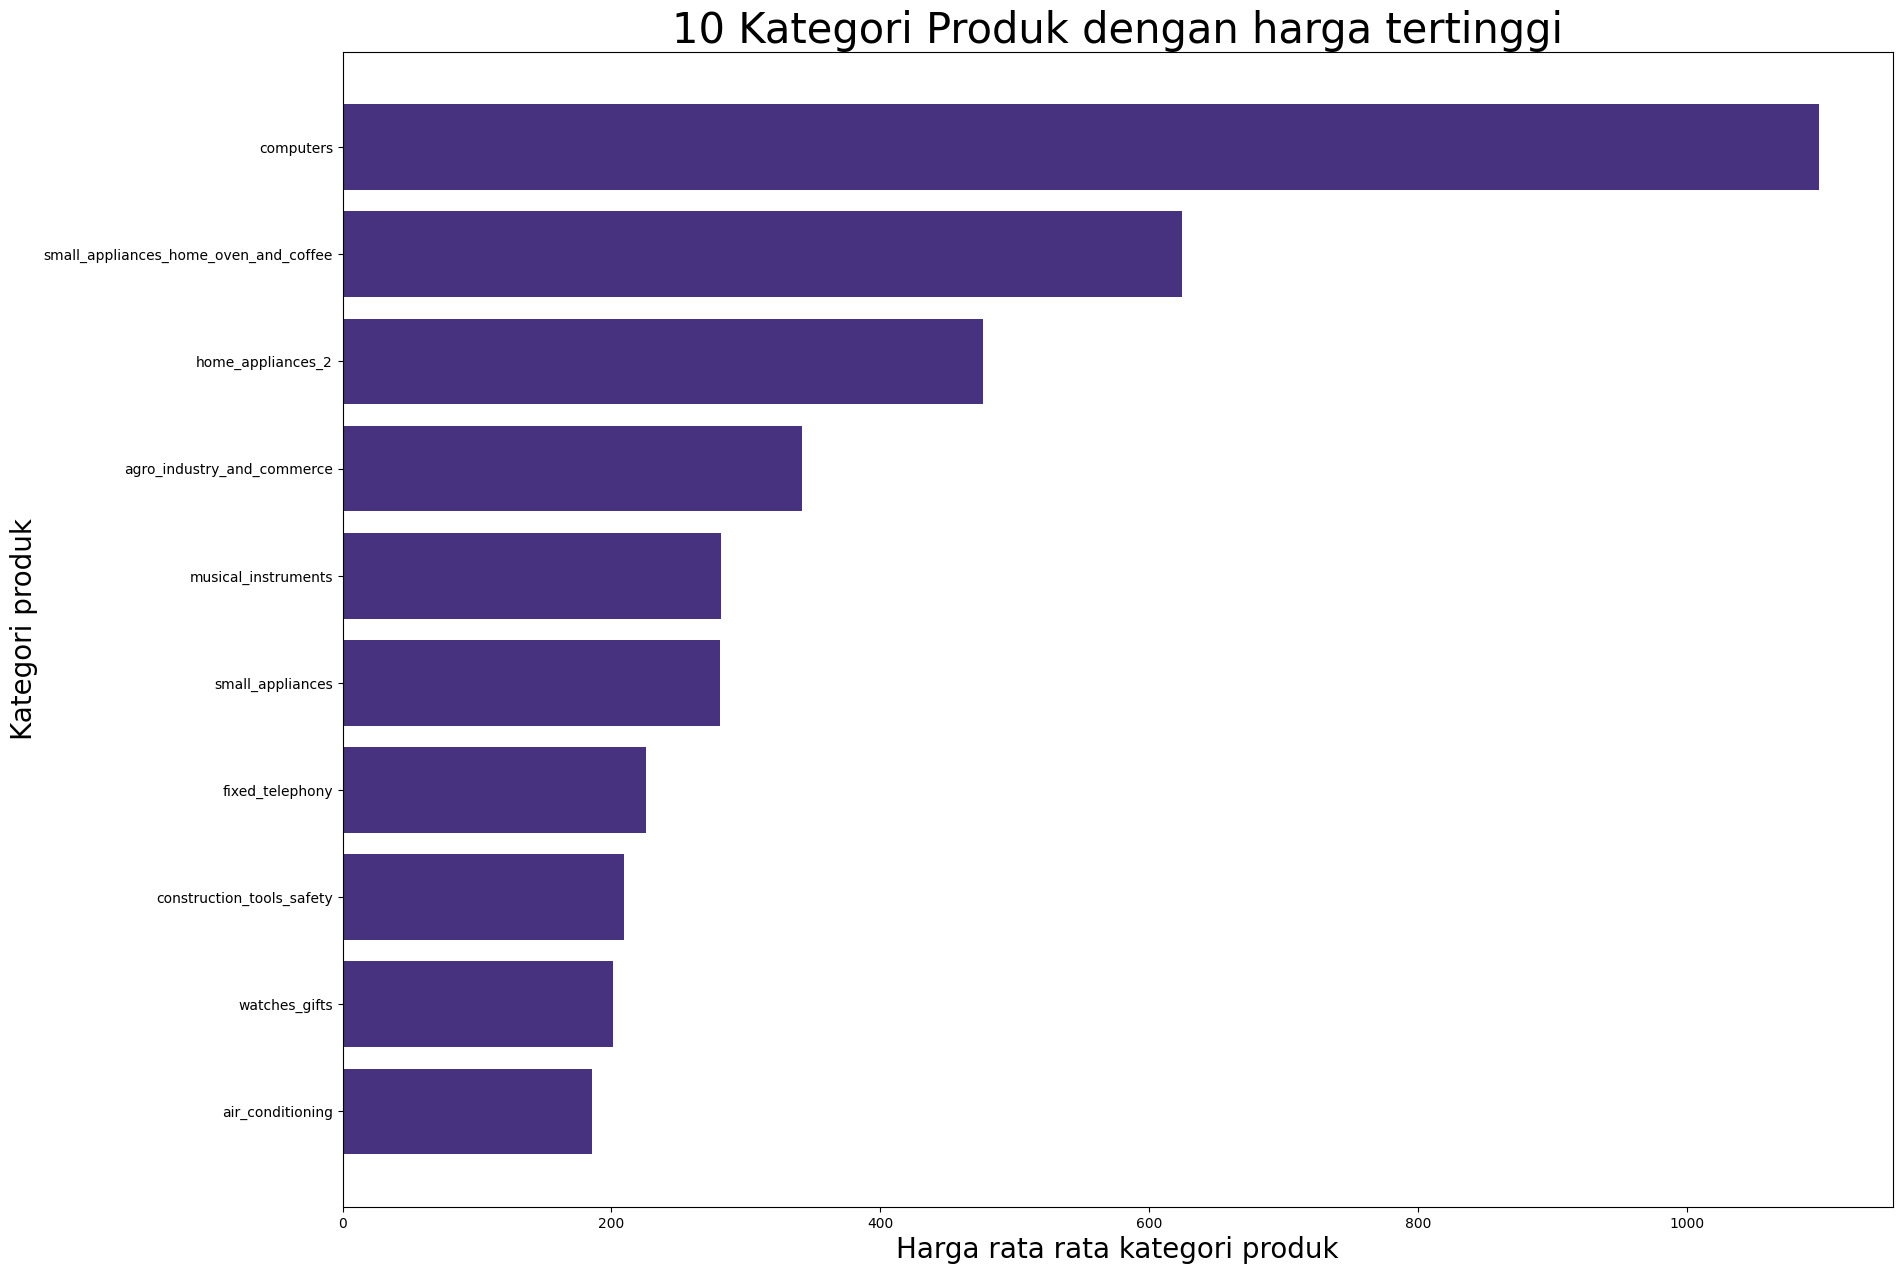

In [365]:
category_avg_price = Studi_Kasus_1.groupby('product_category_name_english')['price'].mean().reset_index()
top_10_categories = category_avg_price.sort_values(by='price', ascending=False).head(10)
#Membuat visualisasi data
plt.figure(figsize=(20,15))
plt.barh(top_10_categories['product_category_name_english'], top_10_categories['price'])
plt.title('10 Kategori Produk dengan harga tertinggi', fontsize=30)
plt.ylabel('Kategori produk', fontsize=20)
plt.xlabel('Harga rata rata kategori produk', fontsize=20)
plt.gca().invert_yaxis()
plt.show()

2. Total penjualan setiap kategori Product (10 Besar)

In [540]:
# Menggabungkan products dan order_item berdasarkan 'product_id'
merged_products_order_item = pd.merge(products, order_item, on='product_id', how='left')
# Menggabungkan merger terbaru dengan product_category berdasarkan 'product_category_name'
Studi_Kasus_2 = pd.merge(merged_products_order_item, product_category, on='product_category_name', how='left')
Studi_Kasus_2.head()

,index_x,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,index_y,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,index,product_category_name_english
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,99413,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,6.0,perfumery
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,36254,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,46.0,art
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,852,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,5.0,sports_leisure
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,8850,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,11.0,baby
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,59150,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,7.0,housewares


In [541]:
# Pilih kolom kode yang digunakan
Studi_Kasus_2 = Studi_Kasus_2[['product_category_name_english','price','order_id']]
Studi_Kasus_2.head()

,product_category_name_english,price,order_id
0,perfumery,10.91,e17e4f88e31525f7deef66779844ddce
1,art,248.00,5236307716393b7114b53ee991f36956
2,sports_leisure,79.80,01f66e58769f84129811d43eefd187fb
3,baby,112.30,143d00a4f2dde4e0364ee1821577adb3
4,housewares,37.90,86cafb8794cb99a9b1b77fc8e48fbbbb


In [542]:
# Cek missing value
Studi_Kasus_2.isnull().sum()

product_category_name_english    1627
price                               0
order_id                            0
dtype: int64

In [543]:
# Handling missing value
Studi_Kasus_2['product_category_name_english']=Studi_Kasus_2['product_category_name_english'].fillna('unkown')
Studi_Kasus_2.isnull().sum()

product_category_name_english    0
price                            0
order_id                         0
dtype: int64

In [696]:
category_sales_orders = Studi_Kasus_2.groupby('product_category_name_english').agg({'price': 'sum', 'order_id': 'nunique'}).reset_index()
category_sales_orders.rename(columns={'price': 'total_sales', 'order_id': 'total_orders',}, inplace=True)


# Menampilkan 10 kategori teratas dengan total penjualan dan jumlah pesanan
top_10_categories_sales = category_sales_orders.sort_values(by='total_sales', ascending=False).head(10)

# Membuat pivot table
pivot_table = top_10_categories_sales.pivot_table(index='product_category_name_english', values=['total_sales', 'total_orders'], aggfunc='sum')
# Mengganti nama kolom 'product_category_name_english' menjadi 'category_name' (jika diperlukan)
pivot_table = pivot_table.rename(columns={'total_sales': 'New_Total_Sales', 'total_orders': 'New_Total_Orders'})

# Mengurutkan hasil secara berdasarkan total penjualan
pivot_table = pivot_table.sort_values(by='New_Total_Sales', ascending=False)

# Membuat palet warna
cm = sns.light_palette("navy", as_cmap=True)

# Menerapkan palet warna ke tabel pivot
styled_pivot = pivot_table.style.background_gradient(cmap=cm)

# Menampilkan tabel pivot dengan palet warna
styled_pivot


,New_Total_Orders,New_Total_Sales
product_category_name_english,,
health_beauty,8836,1258681.340000
watches_gifts,5624,1205005.680000
bed_bath_table,9417,1036988.680000
sports_leisure,7720,988048.970000
computers_accessories,6689,911954.320000
furniture_decor,6449,729762.490000
cool_stuff,3632,635290.850000
housewares,5884,632248.660000
auto,3897,592720.110000


3. Review product 10 besar tertinggi dan 10 besar terendah

In [677]:
# Menggabungkan products dan order_item berdasarkan 'product_id'
merged_order_item_reviews = pd.merge(order_item, reviews, on='order_id', how='left')
# Menggabungkan merger terbaru dengan product_category berdasarkan 'product_category_name'
merged_products_product_category = pd.merge(products, product_category, on='product_category_name', how='left')
# Menggabungkan semua tabel merger
Studi_kasus_3 = pd.merge(merged_order_item_reviews, merged_products_product_category, on='product_id', how='left')
Studi_kasus_3.head()


,index_x_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y_x,review_id,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,index_y_y,product_category_name_english
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,51963.0,97ca439bc427b48bc1cd7177abe71365,...,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22.0,cool_stuff
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,27823.0,7b07bacd811c4117b742569b04ce3580,...,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,29.0,pet_shop
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,4218.0,0c5b33dea94867d1ac402749e5438e8b,...,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,4.0,furniture_decor
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,38844.0,f4028d019cb58564807486a6aaf33817,...,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,6.0,perfumery
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,55676.0,940144190dcba6351888cafa43f3a3a5,...,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,16.0,garden_tools


In [718]:
# Memilih kolom yang diperlukan
Studi_kasus_3=Studi_kasus_3[['product_id','review_score','product_category_name_english']]
Studi_kasus_3.head()

,product_id,review_score,product_category_name_english
0,4244733e06e7ecb4970a6e2683c13e61,5.0,cool_stuff
1,e5f2d52b802189ee658865ca93d83a8f,4.0,pet_shop
2,c777355d18b72b67abbeef9df44fd0fd,5.0,furniture_decor
3,7634da152a4610f1595efa32f14722fc,4.0,perfumery
4,ac6c3623068f30de03045865e4e10089,5.0,garden_tools


In [692]:
# Cek duplikasi data
Studi_kasus_3.duplicated().sum()

63102

In [694]:
# Misiing value
Studi_kasus_3.isnull().sum()

product_id                       0
review_score                     0
product_category_name_english    0
dtype: int64

In [715]:
from tabulate import tabulate

# Produk dengan rating tertinggi
highest_rated_product = Studi_kasus_3.loc[Studi_kasus_3['review_score'].idxmax()]

# Produk dengan rating terendah
lowest_rated_product = Studi_kasus_3.loc[Studi_kasus_3['review_score'].idxmin()]

# Membuat list data untuk tabel
data = [
    ["Product ID", highest_rated_product["product_id"], lowest_rated_product["product_id"]],
    ["Product Category", highest_rated_product["product_category_name_english"], lowest_rated_product["product_category_name_english"]],
    ["Review Score", highest_rated_product["review_score"], lowest_rated_product["review_score"]]
]

# Membuat tabel dengan format tabulate
table = tabulate(data, headers="firstrow", tablefmt="fancy_grid")

# Menampilkan tabel
print("Produk dengan rating tertinggi dan terendah:")
print(table)


Produk dengan rating tertinggi dan terendah:
╒══════════════════╤════════════════════════════════════╤════════════════════════════════════╕
│ Product ID       │ 4244733e06e7ecb4970a6e2683c13e61   │ 310ae3c140ff94b03219ad0adc3c778f   │
╞══════════════════╪════════════════════════════════════╪════════════════════════════════════╡
│ Product Category │ cool_stuff                         │ health_beauty                      │
├──────────────────┼────────────────────────────────────┼────────────────────────────────────┤
│ Review Score     │ 5.0                                │ 1.0                                │
╘══════════════════╧════════════════════════════════════╧════════════════════════════════════╛
